In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

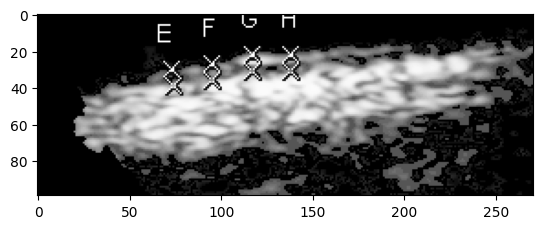

In [3]:
# Load the ultrasound image
img = cv2.imread(r'C:\Users\Vivek\Downloads\FETAL_PLANES_ZENODO\Images\Patient00001_Plane1_2_of_15.png', 0)  

# Apply histogram equalization to enhance contrast
equalized_img = cv2.equalizeHist(img)

# Apply median blur for noise reduction
median_blur = cv2.medianBlur(equalized_img, 5)

# Thresholding to create a binary mask of the cranium and brain
_, cranium_brain_mask = cv2.threshold(median_blur, 180, 255, cv2.THRESH_BINARY)

# Find contours in the mask
contours, _ = cv2.findContours(cranium_brain_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find the contour with the largest area
max_contour = max(contours, key=cv2.contourArea)

# Create a blank mask image
mask_image = np.zeros_like(img)

# Draw the largest contour on the mask
cv2.drawContours(mask_image, [max_contour], -1, (255), thickness=cv2.FILLED)

# Create a circular mask centered at the image center
center_x = img.shape[1] // 2
center_y = img.shape[0] // 2
radius = int(min(img.shape) * 0.4)  # Adjust the radius as needed
cv2.circle(mask_image, (center_x, center_y), radius, (255), thickness=cv2.FILLED)

# Apply the mask to the original image
output_image = cv2.bitwise_and(img, mask_image)

# Find the bounding box of the largest contour
x, y, w, h = cv2.boundingRect(max_contour)

# Add padding to the bounding box
padding = 20  # Adjust the padding size as needed
x -= padding
y -= padding
w += 2 * padding
h += 2 * padding

# Ensure the bounding box is within the image boundaries
x = max(0, x)
y = max(0, y)
w = min(w, img.shape[1] - x)
h = min(h, img.shape[0] - y)

# Crop the output image to the bounding box region
output_image = output_image[y:y+h, x:x+w]

# Enhance the output image
enhanced_image = cv2.equalizeHist(output_image)

# Display the enhanced output
plt.imshow(enhanced_image, cmap='gray')
plt.show()



In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Input and output folder paths
input_folder = r'C:\Users\Vivek\Downloads\FETAL_PLANES_ZENODO\Images'
output_folder = r'C:\Users\Vivek\Downloads\FETAL_PLANES_ZENODO\Images\02.Enhancement and Segmentation'

# Ensure the output folder exists
os.makedirs(output_folder, exist_ok=True)
counter=0
# Process each image in the input folder
for filename in os.listdir(input_folder):
    counter=counter+1
    print(counter)
    # Read the image as grayscale
    img_path = os.path.join(input_folder, filename)
    img = cv2.imread(img_path, 0)
    # Add this check before processing the image
    if not os.path.isfile(img_path):
        print(f"Error: Image file not found - {img_path}")
        continue  # Skip to the next iteration


    # Apply histogram equalization to enhance contrast
    equalized_img = cv2.equalizeHist(img)

    # Apply median blur for noise reduction
    median_blur = cv2.medianBlur(equalized_img, 5)

    # Thresholding to create a binary mask of the cranium and brain
    _, cranium_brain_mask = cv2.threshold(median_blur, 180, 255, cv2.THRESH_BINARY)

    # Find contours in the mask
    contours, _ = cv2.findContours(cranium_brain_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Find the contour with the largest area
    max_contour = max(contours, key=cv2.contourArea)

    # Create a blank mask image
    mask_image = np.zeros_like(img)

    # Draw the largest contour on the mask
    cv2.drawContours(mask_image, [max_contour], -1, (255), thickness=cv2.FILLED)

    # Create a circular mask centered at the image center
    center_x = img.shape[1] // 2
    center_y = img.shape[0] // 2
    radius = int(min(img.shape) * 0.4)  # Adjust the radius as needed
    cv2.circle(mask_image, (center_x, center_y), radius, (255), thickness=cv2.FILLED)

    # Apply the mask to the original image
    output_image = cv2.bitwise_and(img, mask_image)

    # Find the bounding box of the largest contour
    x, y, w, h = cv2.boundingRect(max_contour)

    # Add padding to the bounding box
    padding = 20  # Adjust the padding size as needed
    x -= padding
    y -= padding
    w += 2 * padding
    h += 2 * padding

    # Ensure the bounding box is within the image boundaries
    x = max(0, x)
    y = max(0, y)
    w = min(w, img.shape[1] - x)
    h = min(h, img.shape[0] - y)

    # Crop the output image to the bounding box region
    output_image = output_image[y:y+h, x:x+w]

    # Enhance the output image
    enhanced_image = cv2.equalizeHist(output_image)

    # Save the enhanced output image
    output_path = os.path.join(output_folder, filename)
    cv2.imwrite(output_path, enhanced_image)

    

print("Processing completed.")

1
Error: Image file not found - C:\Users\Vivek\Downloads\FETAL_PLANES_ZENODO\Images\02.Enhancement and Segmentation
2
Error: Image file not found - C:\Users\Vivek\Downloads\FETAL_PLANES_ZENODO\Images\FETAL_PLANES_ZENODO
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223


In [5]:
# import cv2
# import numpy as np
# import os

# # Source directory containing the images
# source_directory = r'C:\Users\Vivek\Downloads\FETAL_PLANES_ZENODO\Images'


# # Output directory to save the results
# output_directory = r'C:\Users\Vivek\Downloads\FETAL_PLANES_ZENODO\Images\02.Enhancement and Segmentation'


# # Loop over all the images in the source directory
# for filename in os.listdir(output_directory):
#     image_path = os.path.join(output_directory, filename)

#     # Read the image
#     input_img = cv2.imread(image_path)
    
#     # Convert the image to grayscale
#     img_gray = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)

#     # Apply median blur
#     median_blur = cv2.medianBlur(img_gray, 5)

#     # Apply Laplacian
#     laplacian_out = cv2.Laplacian(median_blur, cv2.CV_8U, -1)

#     # Sharpen the image
#     img_sharpened = cv2.addWeighted(img_gray, 1.5, laplacian_out, -0.5, 0)

#     # Create a mask using Sobel operator
#     sobel_x = cv2.Sobel(median_blur, cv2.CV_16S, 1, 0, ksize=-1)
#     sobel_x_abs = cv2.convertScaleAbs(sobel_x)
#     sobel_y = cv2.Sobel(median_blur, cv2.CV_16S, 0, 1, ksize=-1)
#     sobel_y_abs = cv2.convertScaleAbs(sobel_y)
#     mask_image = cv2.bitwise_and(sobel_x_abs, sobel_y_abs)

#     # Combine the sharpened image and mask
#     final = cv2.addWeighted(img_sharpened, 1, mask_image, 0.5, 0)

#     # Save the final image to the output directory
#     output_path = os.path.join(output_directory, filename)
#     cv2.imwrite(output_path, final)


In [6]:
# Path to the dataset folder containing the images
dataset_folder = r'C:\Users\Vivek\Downloads\FETAL_PLANES_ZENODO\Images\02.Enhancement and Segmentation'

# Path to the Excel file
excel_file = r'C:\Users\Vivek\Downloads\FETAL_PLANES_ZENODO\FETAL_PLANES_DB_data.xlsx'
import pandas as pd
# Read the Excel file into a DataFrame
df = pd.read_excel(excel_file)
df

C:\Users\Vivek\AppData\Local\Temp\ipykernel_17216\2159572644.py:6: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Image_name,Patient_num,Plane,Brain_plane,Operator,US_Machine,Train
0,Patient00001_Plane1_1_of_15,1,Other,Not A Brain,Other,Aloka,1
1,Patient00001_Plane1_2_of_15,1,Other,Not A Brain,Other,Aloka,1
2,Patient00001_Plane1_3_of_15,1,Other,Not A Brain,Other,Aloka,1
3,Patient00001_Plane1_4_of_15,1,Other,Not A Brain,Other,Aloka,1
4,Patient00001_Plane1_5_of_15,1,Other,Not A Brain,Other,Aloka,1
...,...,...,...,...,...,...,...
12395,Patient01791_Plane5_1_of_1,1791,Fetal femur,Not A Brain,Other,Voluson S10,0
12396,Patient01792_Plane2_1_of_1,1792,Fetal abdomen,Not A Brain,Other,Voluson E6,0
12397,Patient01792_Plane3_1_of_1,1792,Fetal brain,Trans-thalamic,Other,Voluson E6,0
12398,Patient01792_Plane5_1_of_1,1792,Fetal femur,Not A Brain,Other,Voluson E6,0


In [7]:
df['Brain_plane'].value_counts()

Brain_plane
Not A Brain          9308
Trans-thalamic       1638
Trans-cerebellum      714
Trans-ventricular     597
Other                 143
Name: count, dtype: int64

In [8]:
import pandas as pd
import os
import shutil

# Path to the dataset folder containing the images
dataset_folder = r'C:\Users\Vivek\Downloads\FETAL_PLANES_ZENODO\Images\02.Enhancement and Segmentation'

# Path to the Excel file
excel_file = r'C:\Users\Vivek\Downloads\FETAL_PLANES_ZENODO\FETAL_PLANES_DB_data.xlsx'

# Read the Excel file into a DataFrame
df = pd.read_excel(excel_file)

# Create the three separate folders for each plane
output_folder_plane1 = r'C:\Users\Vivek\Downloads\FETAL_PLANES_ZENODO\Images\03. Segregation/01_Cere'
output_folder_plane2 = r'C:\Users\Vivek\Downloads\FETAL_PLANES_ZENODO\Images\03. Segregation/02_Thalam'
output_folder_plane3 = r'C:\Users\Vivek\Downloads\FETAL_PLANES_ZENODO\Images\03. Segregation/03_Ventri'

# Create the output folders if they don't exist
os.makedirs(output_folder_plane1, exist_ok=True)
os.makedirs(output_folder_plane2, exist_ok=True)
os.makedirs(output_folder_plane3, exist_ok=True)
counter=0
# Iterate over the rows in the DataFrame
for index, row in df.iterrows():
    image_name = row['Image_name']
    plane_name = row['Brain_plane']

    # Determine the destination folder based on the plane name
    if plane_name == 'Trans-cerebellum':
        destination_folder = output_folder_plane1
        print("WE ARE INSIDE 1")
    elif plane_name == 'Trans-thalamic':
        destination_folder = output_folder_plane2
        print("WE ARE INSIDE 2")
    elif plane_name == 'Trans-ventricular':
        destination_folder = output_folder_plane3
        print("WE ARE INSIDE 3")
    else:
        # Skip the image if the plane name is not recognized
        continue

    # Construct the source and destination paths
    source_path = os.path.join(dataset_folder, image_name)
    destination_path = os.path.join(destination_folder, image_name)
    
    # MODIFICATION 1:
    if os.path.exists(source_path):
        # Copy the image to the destination folder
        shutil.copy2(source_path, destination_path)
    else:
        print(f"Source path '{source_path}' does not exist. Skipping copy operation for image '{image_name}'.")
        counter=counter+1
    # Copy the image to the destination folder
    # shutil.copy2(source_path, destination_path)

print('Images segregation complete.')
print("counter" , counter)

WE ARE INSIDE 2
Source path 'C:\Users\Vivek\Downloads\FETAL_PLANES_ZENODO\Images\02.Enhancement and Segmentation\Patient00168_Plane3_1_of_3' does not exist. Skipping copy operation for image 'Patient00168_Plane3_1_of_3'.
WE ARE INSIDE 2
Source path 'C:\Users\Vivek\Downloads\FETAL_PLANES_ZENODO\Images\02.Enhancement and Segmentation\Patient00168_Plane3_2_of_3' does not exist. Skipping copy operation for image 'Patient00168_Plane3_2_of_3'.
WE ARE INSIDE 1
Source path 'C:\Users\Vivek\Downloads\FETAL_PLANES_ZENODO\Images\02.Enhancement and Segmentation\Patient00168_Plane3_3_of_3' does not exist. Skipping copy operation for image 'Patient00168_Plane3_3_of_3'.
WE ARE INSIDE 2
Source path 'C:\Users\Vivek\Downloads\FETAL_PLANES_ZENODO\Images\02.Enhancement and Segmentation\Patient00188_Plane3_1_of_3' does not exist. Skipping copy operation for image 'Patient00188_Plane3_1_of_3'.
WE ARE INSIDE 3
Source path 'C:\Users\Vivek\Downloads\FETAL_PLANES_ZENODO\Images\02.Enhancement and Segmentation\Pat

In [9]:
import pandas as pd
import os
import shutil

# Path to the dataset folder containing the images
dataset_folder = r'C:\Users\Vivek\Downloads\FETAL_PLANES_ZENODO\Images\02.Enhancement and Segmentation'

# Path to the Excel file
excel_file = r'C:\Users\Vivek\Downloads\FETAL_PLANES_ZENODO\FETAL_PLANES_DB_data.xlsx'

# Read the Excel file into a DataFrame
df = pd.read_excel(excel_file)

# Create the three separate folders for each plane
output_folder_plane1 = r'C:\Users\Vivek\Downloads\FETAL_PLANES_ZENODO\Images\03. Segregation/01_Cere'
output_folder_plane2 = r'C:\Users\Vivek\Downloads\FETAL_PLANES_ZENODO\Images\03. Segregation/02_Thalam'
output_folder_plane3 = r'C:\Users\Vivek\Downloads\FETAL_PLANES_ZENODO\Images\03. Segregation/03_Ventri'

# Create the output folders if they don't exist
os.makedirs(output_folder_plane1, exist_ok=True)
os.makedirs(output_folder_plane2, exist_ok=True)
os.makedirs(output_folder_plane3, exist_ok=True)

# Print the destination folders for each category
print("Output folder for cerebellum:", output_folder_plane1)
print("Output folder for thalamic:", output_folder_plane2)
print("Output folder for ventricular:", output_folder_plane3)

# Iterate over the rows in the DataFrame
for index, row in df.iterrows():
    image_name = row['Image_name']
    plane_name = row['Brain_plane']

    # Print the image name and plane name for each row
    print(f"Processing image: {image_name}, Plane: {plane_name}")

    # Determine the destination folder based on the plane name
    
    if plane_name == 'Trans-cerebellum':
        print('inside cere')
        destination_folder = output_folder_plane1
    elif plane_name == 'Trans-thalamic':
        destination_folder = output_folder_plane2
    elif plane_name == 'Trans-ventricular':
        destination_folder = output_folder_plane3
    else:
        # Skip the image if the plane name is not recognized
        print(f"Skipping image {image_name} - Unrecognized plane name: {plane_name}")
        continue

    # Construct the source and destination paths
    source_path = os.path.join(dataset_folder, image_name)
    destination_path  = os.path.join(destination_folder, image_name)
    # Print the destination path for each image
    print(f"Destination path: {destination_path}")

    # Check if the source file exists before copying
    if not os.path.isfile(source_path):
        print(f"Error: Source file not found - {source_path}")
        continue  # Skip to the next iteration

    # Copy the image to the destination folder
    shutil.copy2(source_path, destination_path)

    print(f"Image {image_name} successfully copied to {destination_folder}")

print('Images segregation complete.')






Output folder for cerebellum: C:\Users\Vivek\Downloads\FETAL_PLANES_ZENODO\Images\03. Segregation/01_Cere
Output folder for thalamic: C:\Users\Vivek\Downloads\FETAL_PLANES_ZENODO\Images\03. Segregation/02_Thalam
Output folder for ventricular: C:\Users\Vivek\Downloads\FETAL_PLANES_ZENODO\Images\03. Segregation/03_Ventri
Processing image: Patient00001_Plane1_1_of_15, Plane: Not A Brain
Skipping image Patient00001_Plane1_1_of_15 - Unrecognized plane name: Not A Brain
Processing image: Patient00001_Plane1_2_of_15, Plane: Not A Brain
Skipping image Patient00001_Plane1_2_of_15 - Unrecognized plane name: Not A Brain
Processing image: Patient00001_Plane1_3_of_15, Plane: Not A Brain
Skipping image Patient00001_Plane1_3_of_15 - Unrecognized plane name: Not A Brain
Processing image: Patient00001_Plane1_4_of_15, Plane: Not A Brain
Skipping image Patient00001_Plane1_4_of_15 - Unrecognized plane name: Not A Brain
Processing image: Patient00001_Plane1_5_of_15, Plane: Not A Brain
Skipping image Patien

In [10]:
import os
import cv2
import numpy as np
import tkinter as tk
from tkinter import filedialog, messagebox
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split


# ## 03. Training the Model

# ## 03.a. Trans_Cerebellum Plane

# In[13]:


import numpy as np
import os
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models

# Path to the folder containing the ultrasound images
images_folder = r'C:\Users\Vivek\Downloads\FETAL_PLANES_ZENODO\Images\00. Misc\Resized'

# Load and preprocess the ultrasound images
images = []
for filename in os.listdir(images_folder):
    if filename.endswith(".DS_Store"):
        continue
    
    image_path = os.path.join(images_folder, filename)
    
    try:
        image = cv2.imread(image_path)
        if image is None:
            print(f"Error loading image: {image_path}")
            continue

        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (224, 224))
        image = image.astype('float32') / 255.0
        images.append(image)
    except Exception as e:
        print(f"Error processing image: {image_path}")
        print(e)

images = np.array(images)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\Vivek\\Downloads\\FETAL_PLANES_ZENODO\\Images\\00. Misc\\Resized'

In [ ]:
print('hello')

hello
